In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ddos-sdn-dataset/dataset_sdn.csv


In [46]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [47]:
data = pd.read_csv('/kaggle/input/ddos-sdn-dataset/dataset_sdn.csv')

## I .Data Analysis


In [48]:
data.head()


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [49]:
data.shape

(104345, 23)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [51]:
# column names
column_names= data.columns
column_names

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

Text(0, 0.5, 'Count')

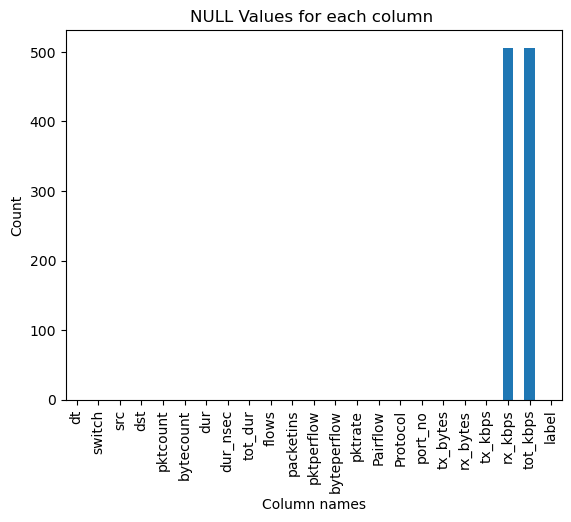

In [52]:
# Null values sum 
data.isnull().sum().plot.bar()
plt.title("NULL Values for each column ")
plt.xlabel("Column names")
plt.ylabel("Count")

In [53]:
# Dropping rows having null values
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-

### Getting unique destionations used in dataset

In [54]:
# Getting unique destination 
uniq_dest=data['dst'].unique()
total_dst=len(uniq_dest)
print("Total destination : ", total_dst)
print("Different destination : ",uniq_dest)

Total destination :  18
Different destination :  ['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']


### Doing analysis for malicious and normal traffic 

Text(0.5, 1.0, 'Traffic for normal and Malicious traffic')

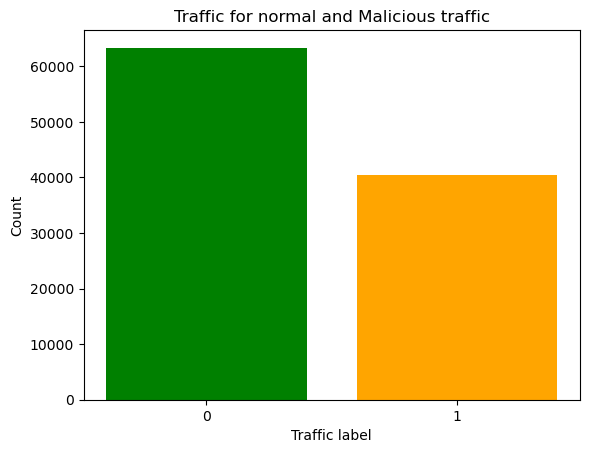

In [55]:
gp=data.groupby('label')['label'].count()
plt.bar(list(gp.index),list(gp.values),color=['g','orange'])
plt.xticks(list(gp.index))
plt.xlabel("Traffic label")
plt.ylabel("Count")
plt.title("Traffic for normal and Malicious traffic")

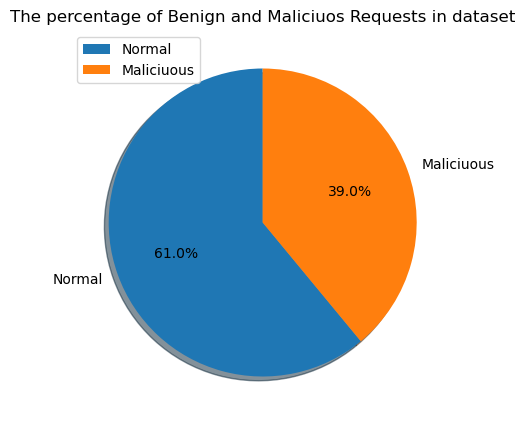

In [56]:
labels = ['Normal',"Maliciuous"]
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend([ "Normal","Maliciuous"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

Text(0.5, 1.0, 'Attack and Normal traffic ')

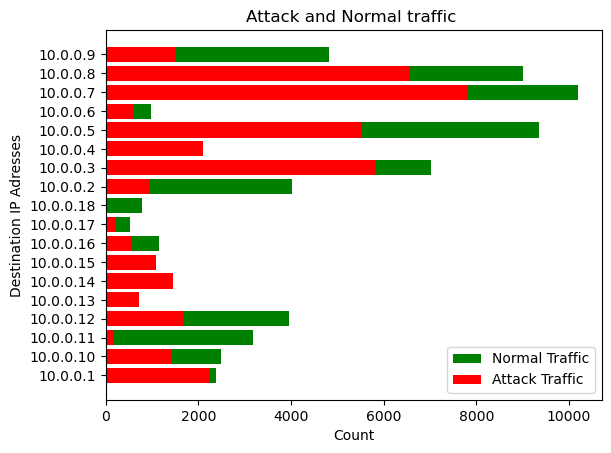

In [57]:
ip_addr=data[data['label']==0].groupby('dst').count()['label'].index
normal_traffic=data.groupby(['dst','label']).size().unstack().fillna(0)[0]
attack_traffic=data.groupby(['dst','label']).size().unstack().fillna(0)[1]
plt.barh(ip_addr,normal_traffic,color='green', label='Normal Traffic')
plt.barh(ip_addr,attack_traffic,color='red', label='Attack Traffic')
plt.legend()
plt.xlabel("Count")
plt.ylabel("Destination IP Adresses")
plt.title("Attack and Normal traffic ")

## II. Data Preprocessing

In [58]:
df = data.copy()
df = df.dropna()

## III. Deep Learning on Data

In [64]:
Y = data["label"]
X = data.drop(["label"],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=104, test_size=0.2)
train_data=pd.concat(
[X_train,Y_train],axis=1,join="inner"
)

correl = train_data.corr()["label"].sort_values()
correl.drop("label",inplace=True)


/tmp/ipykernel_32/3908909153.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = train_data.corr()["label"].sort_values()


flows         -0.182529
dt            -0.110323
tot_dur       -0.100753
dur           -0.100740
rx_bytes      -0.057060
tx_bytes      -0.048670
Pairflow      -0.047342
byteperflow   -0.013402
tot_kbps      -0.008023
rx_kbps       -0.006728
tx_kbps       -0.004693
port_no       -0.002240
packetins      0.000878
dur_nsec       0.026757
switch         0.028156
pktperflow     0.088322
pktrate        0.088516
bytecount      0.279051
pktcount       0.403304
Name: label, dtype: float64

### Feature Selection

In [69]:
selected = correl.loc[abs(correl) > 0.08]
attr_selected = list(selected.index)
print(attr_selected)


['flows', 'dt', 'tot_dur', 'dur', 'pktperflow', 'pktrate', 'bytecount', 'pktcount']


In [76]:
normal_train_x_data = (X_train.select_dtypes(include=["float64","int64"])-X_train.min(numeric_only=True))
normal_test_x_data = (X_test.select_dtypes(include=["float64","int64"])-X_test.min(numeric_only=True))

normal_train_x_data = preprocessing.scale(normal_train_x_data[attr_selected])
normal_test_x_data = preprocessing.scale(normal_test_x_data[attr_selected])


Y_train.shape

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


(83071,)

### Train deep learning model

In [77]:
model = keras.Sequential(
[
    layers.Dense(units=1024,activation='relu',input_shape=[len(attr_selected)]),
    layers.Dense(units=1024,activation='relu'),
    layers.Dense(units=1024,activation='relu'),
    layers.Dense(units=1024,activation='relu'),
    layers.Dense(units=1024,activation='relu'),
    layers.Dense(units=1,activation='sigmoid')
]
)

In [81]:
model.compile(optimizer='Adamax',loss='mae')
earlystop = EarlyStopping(min_delta=0.01,patience=10,restore_best_weights=True)

In [84]:
model.fit(
    x=normal_train_x_data,
    y=Y_train,
    epochs=10,
    batch_size=20000,
    callbacks=[earlystop]  # Use 'callbacks' instead of 'callback'
)


Epoch 1/10
5/5 [==============================] - 13s 3s/step - loss: 0.2481
Epoch 2/10
5/5 [==============================] - 13s 3s/step - loss: 0.1819
Epoch 3/10
5/5 [==============================] - 13s 3s/step - loss: 0.1502
Epoch 4/10
5/5 [==============================] - 13s 3s/step - loss: 0.1211
Epoch 5/10
5/5 [==============================] - 13s 3s/step - loss: 0.1033
Epoch 6/10
5/5 [==============================] - 13s 3s/step - loss: 0.1004
Epoch 7/10
5/5 [==============================] - 13s 3s/step - loss: 0.0936
Epoch 8/10
5/5 [==============================] - 13s 3s/step - loss: 0.0904
Epoch 9/10
5/5 [==============================] - 13s 3s/step - loss: 0.0872
Epoch 10/10
5/5 [==============================] - 13s 3s/step - loss: 0.0851


### Let's test it!

649/649 [==============================] - 5s 7ms/step
Accuracy: 91.40986132511556%


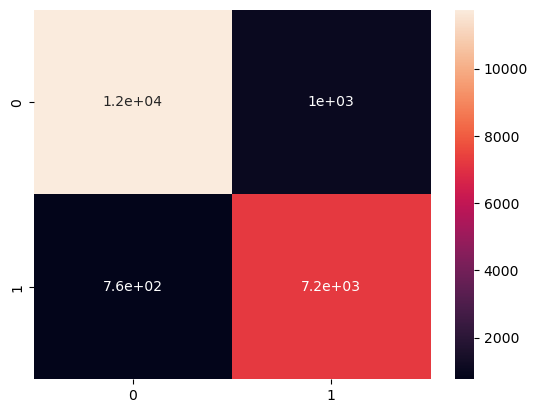

In [88]:
y_pred= pd.Series(model.predict(normal_test_x_data).flatten()).rename('label')
lst = []
for i in y_pred:
    if i>0.5:
        lst.append(1)
    else:
        lst.append(0)
pred = pd.DataFrame(lst)
cm = confusion_matrix(Y_test,pred)
sns.heatmap(cm,annot=True)

print("Accuracy: "+str(accuracy_score(Y_test,pred)*100)+'%')